In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('Mall_customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.drop(['CustomerID'], axis=1, inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

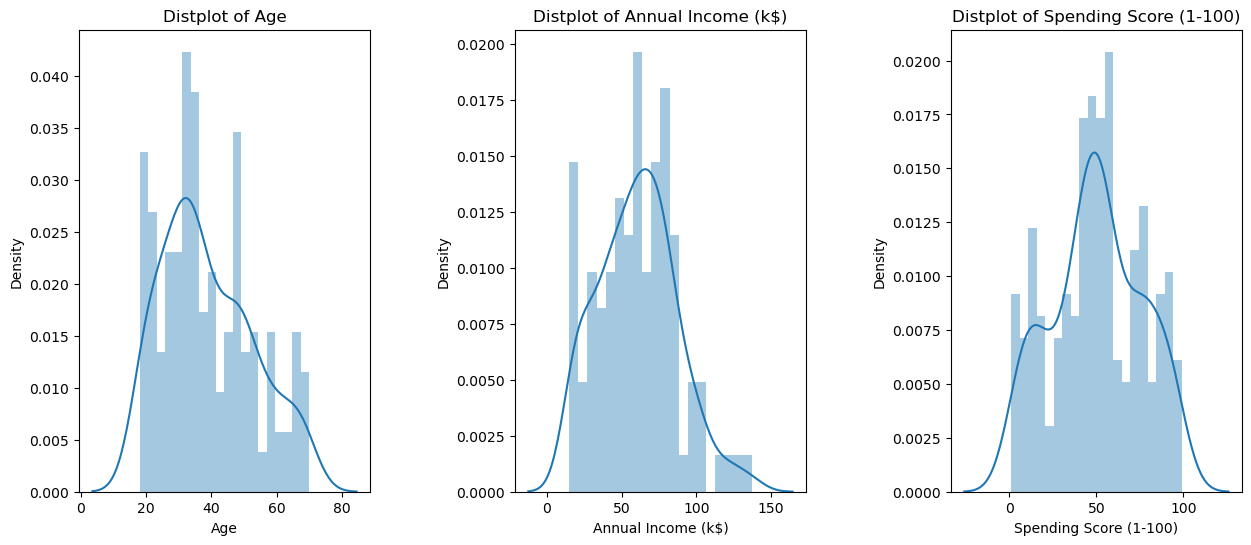

In [10]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)' ,'Spending Score (1-100)' ]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sb.distplot(data[x], bins=20)
    plt.title("Distplot of {}".format(x) )
plt.show()

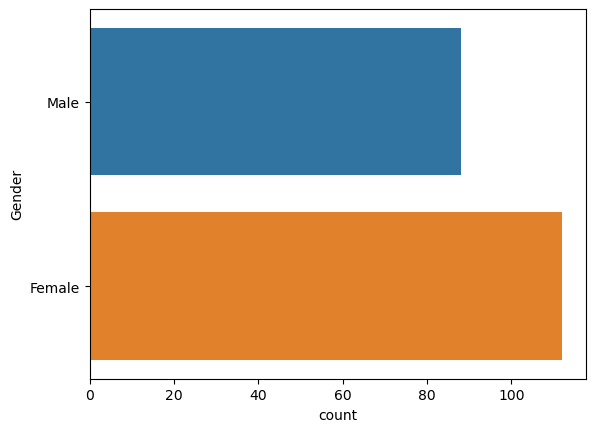

In [11]:
plt.plot(figsize=(15,5))
sb.countplot(y='Gender' , data = data)
plt.show()

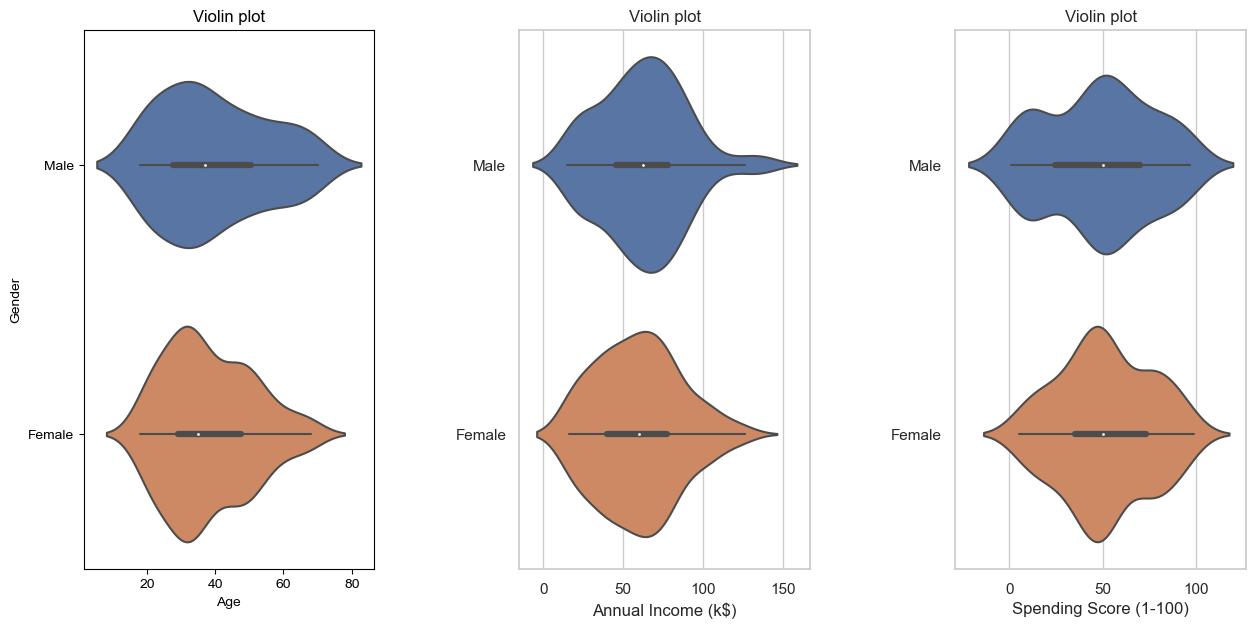

In [12]:
plt.figure(1, figsize=(15,7))
n=0
for col in ['Age','Annual Income (k$)' ,'Spending Score (1-100)' ]:
    n+=1
    plt.subplot(1,3,n)
    sb.set(style = "whitegrid")
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sb.violinplot(x = col, y="Gender" , data = data)
    plt.ylabel('Gender' if n==1 else '')
    plt.title("Violin plot" )
plt.show()

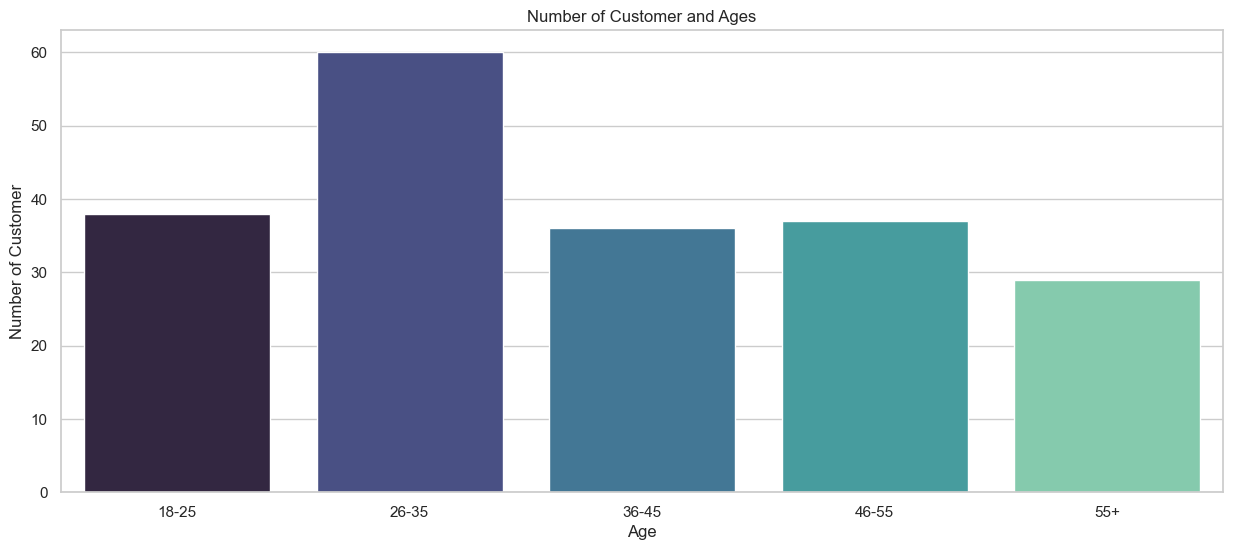

In [13]:
age_18_25=data.Age[(data.Age >= 18) & (data.Age <= 25)]
age_26_35= data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45= data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_46_55= data.Age [(data.Age >= 46) & (data.Age <= 55)]
age_55above = data.Age [data.Age >= 56]
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15,6))
sb.barplot (x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

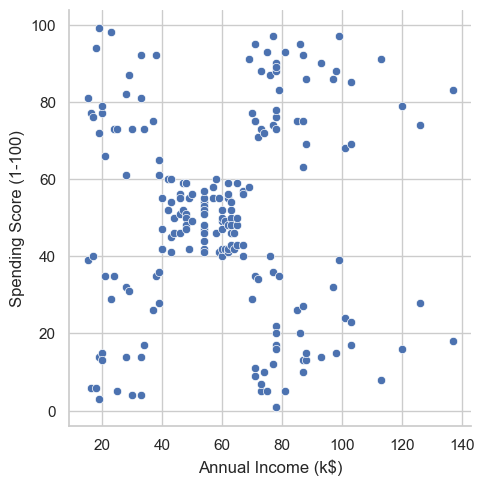

In [14]:
sb.relplot(x='Annual Income (k$)' , y='Spending Score (1-100)' , data = data)

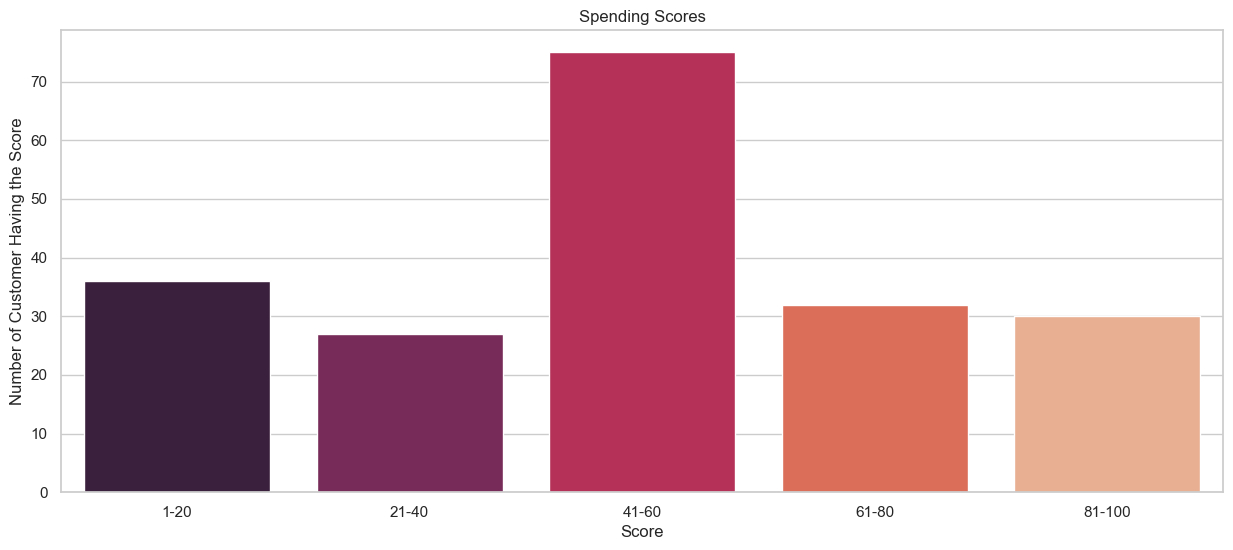

In [15]:
ss_1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss_21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss_41_60= data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss_61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss_81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100. values)]
plt.figure(figsize=(15,6))
sb.barplot (x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

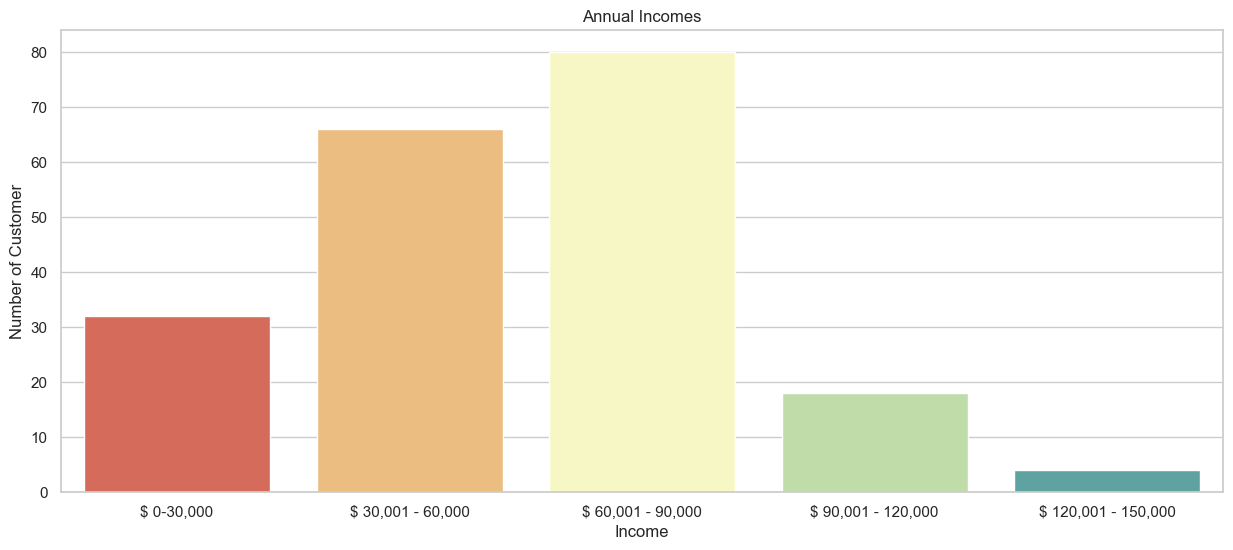

In [16]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60= data["Annual Income (k$)"] [(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 =data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150= data ["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data ["Annual Income (k$)"] <= 150)]
aix= ["$ 0-30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy=[len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
plt.figure(figsize=(15,6))
sb.barplot (x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

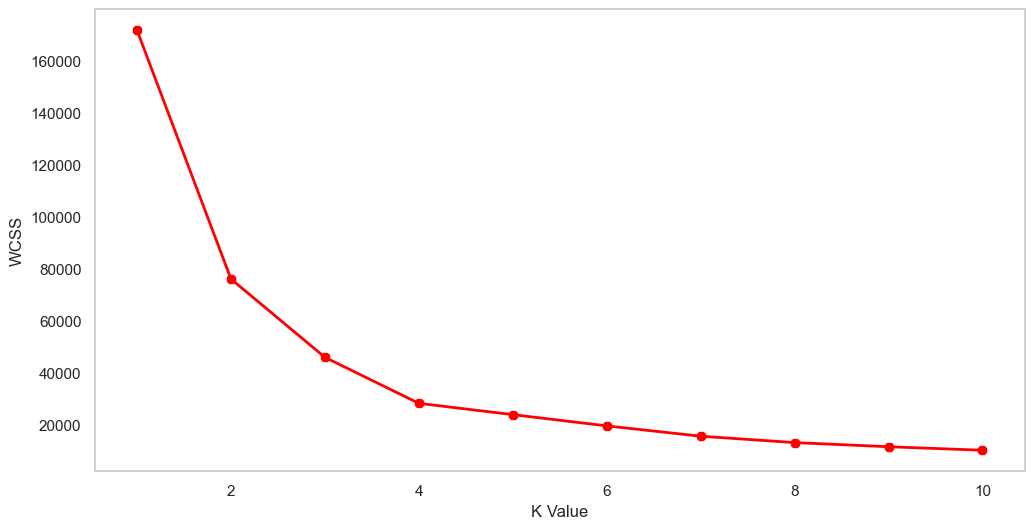

In [17]:
# crearting clusters
X1=data.loc[:, ["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans

wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [19]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


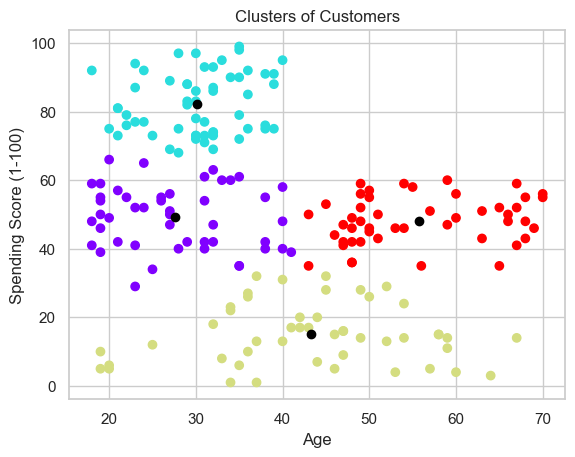

In [20]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans. labels_, cmap= 'rainbow')
#black dots are cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black') 
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.show()

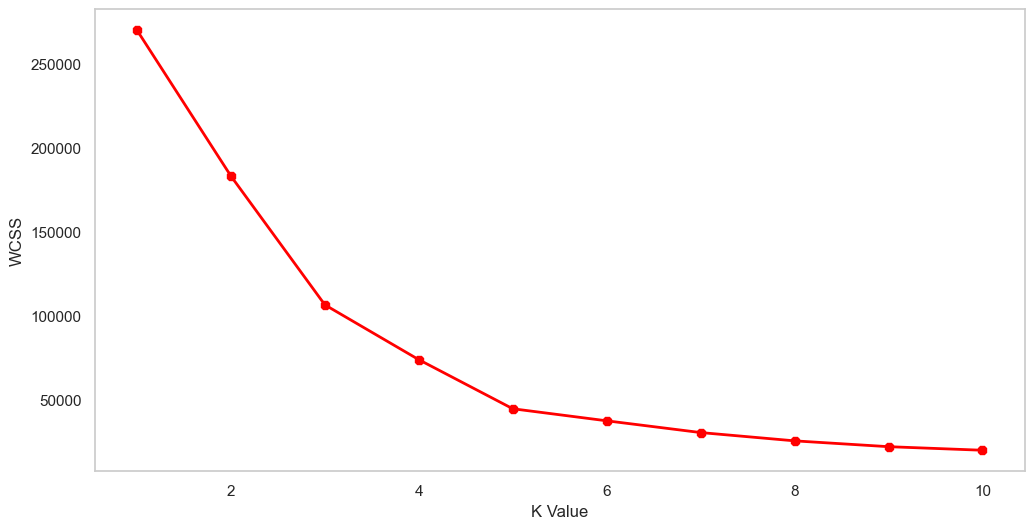

In [21]:
# crearting clusters
X2=data.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans

wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [23]:
print(kmeans.cluster_centers_)


[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


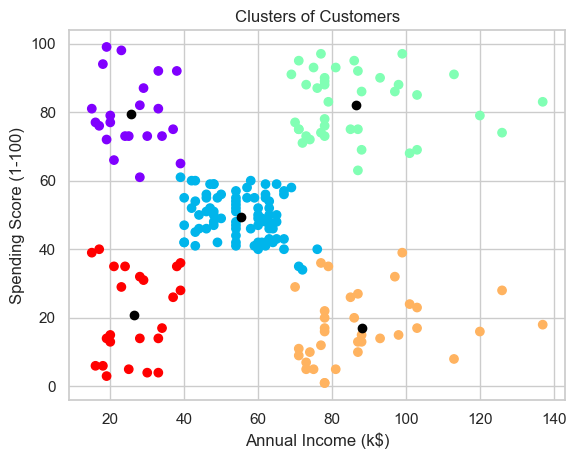

In [24]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans. labels_, cmap= 'rainbow')
#black dots are cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black') 
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.show()

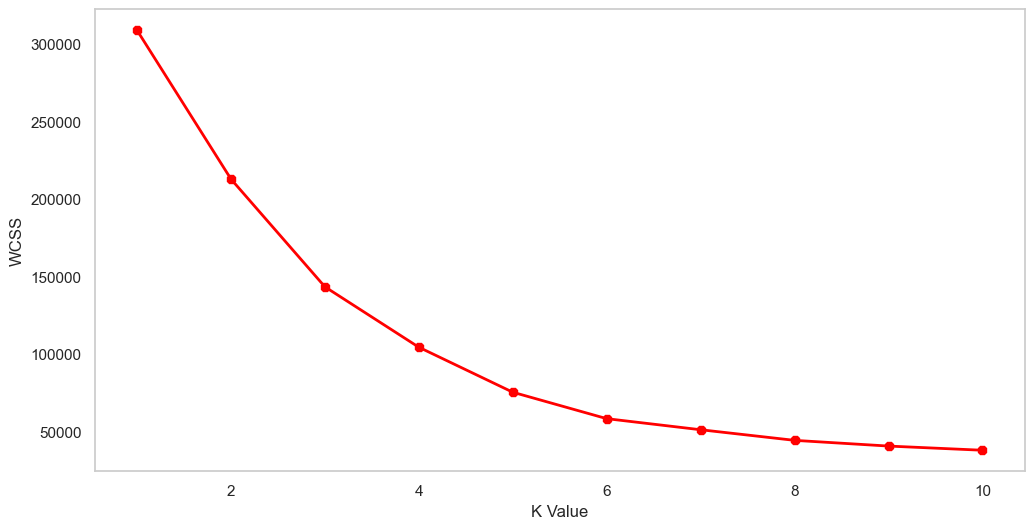

In [25]:
X3=data.iloc[:, 1:]
from sklearn.cluster import KMeans

wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


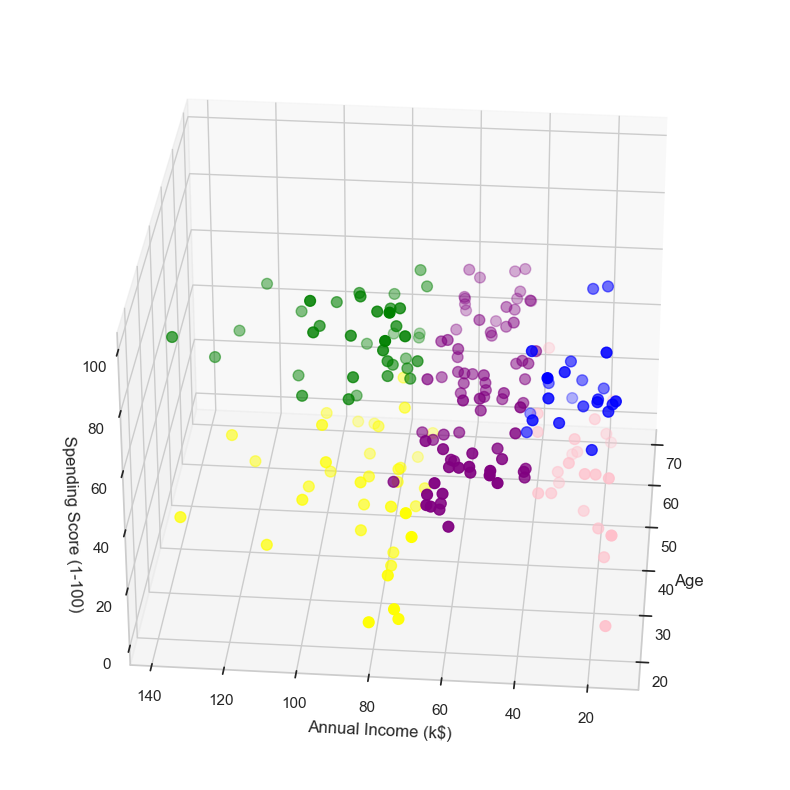

In [27]:
clusters = kmeans.fit_predict(X3) 
data["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label==0], data['Annual Income (k$)'][data.label==0] , data['Spending Score (1-100)'][data.label==0], c='blue', s=60  )
ax.scatter(data.Age[data.label==1], data['Annual Income (k$)'][data.label==1] , data['Spending Score (1-100)'][data.label==1], c='green', s=60  )
ax.scatter(data.Age[data.label==2], data['Annual Income (k$)'][data.label==2] , data['Spending Score (1-100)'][data.label==2], c='yellow', s=60  )
ax.scatter(data.Age[data.label==3], data['Annual Income (k$)'][data.label==3] , data['Spending Score (1-100)'][data.label==3], c='pink', s=60  )
ax.scatter(data.Age[data.label==4], data['Annual Income (k$)'][data.label==4] , data['Spending Score (1-100)'][data.label==4], c='purple', s=60  )
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()